In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, CSVLogger
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np 


img_width = 150
img_height = 150
train_data_dir = 'data/cat_or_dog/train'
valid_data_dir = 'data/cat_or_dog/validation'

datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['dogs','cats'],
                                              class_mode='binary',
                                              batch_size=16)

validation_generator = datagen.flow_from_directory(directory=valid_data_dir,
                                                   target_size=(img_width,img_height),
                                                   classes=['dogs','cats'],
                                                   class_mode='binary',
                                                   batch_size=16)

model =Sequential()

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
training = model.fit_generator(generator=train_generator,
                               steps_per_epoch=2048 // 16,
                               epochs=20,
                               validation_data=validation_generator,
                               validation_steps=832//16,
                               callbacks=[es, csv_logger])

model.save('models/dog_cat_CNN.h5')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
___________________________________________________________

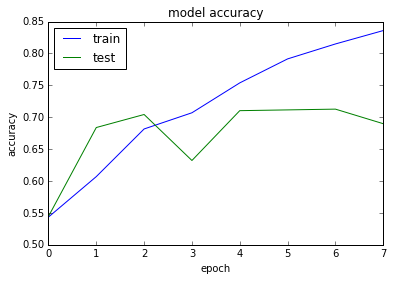

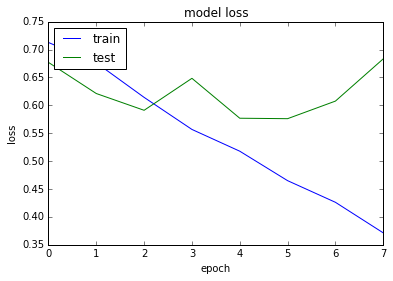

In [30]:
#正答率
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

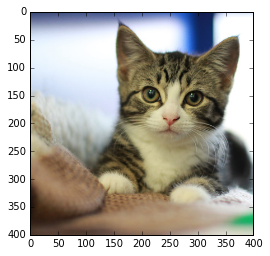

Cat: 74.95 [%]
Dog: 25.05 [%]


In [13]:
from keras.models import load_model
#from keras.preprocessing import image
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#filepath = 'data/cat_or_dog/validation/cats/cat.1000.jpg'
#filepath = 'data/cat_or_dog/validation/dogs/dog.1002.jpg'
filepath = 'data/cat_or_dog/others/002.jpg'

model = load_model('models/dog_cat_CNN.h5')
image=cv2.imread(filepath)

b,g,r = cv2.split(image)
x = cv2.merge([r,g,b])
x = cv2.resize(x,(150, 150))
x = np.array([x / 255.])

#x = image.load_img(filepath, target_size=(150, 150))
#x = image.img_to_array(x)
#x = np.array([x / 255.])

#x = np.array(Image.open(filepath).resize((150, 150)))
#x = np.array([x / 255.])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

result = model.predict(x)
cat_per = result[0][0] * 100
dog_per = 100 - cat_per
print('Cat: ' + str(round(cat_per, 2)), '[%]')
print('Dog: ' + str(round(dog_per, 2)), '[%]')